In [1]:
#CNN is a type of artificial Neural Network which is widely used for object/image recognition and classification.
#Deep Learning recognizes objects in an image by using CNN.

In [2]:
# Import the necessary packages
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# a. Loading and preprocessing the image data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
input_shape = (28,28,1)  # images are greyscale thats why input chaneel is 1

In [4]:
# making sure that the values are float so that we can get the decimal points after devision
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

# print('Data type of x_train:',x_train.dtype)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# print('Data type of x_train after converting to float:',x_train.dtype)


In [5]:
# Normalizing the RGB codes by deviding it to the max RGB value

x_train = x_train/255
x_test = x_test/255

print('shape of training :',x_train.shape)

shape of training : (60000, 28, 28, 1)


In [6]:
print('shape of testing :',x_test.shape)

shape of testing : (10000, 28, 28, 1)


In [7]:
# b. Defining the model’s architecture

model = Sequential()  # used sequential as we have to add layers one after another
model.add(Conv2D(28, kernel_size=(3,3),input_shape=input_shape))
# kernel size - it is kernel size or filter size, it is an size of each convolutional layer, you can change size also
# input shape is input size which we have declared above

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(200,activation='relu'))  # Hidden Layer
model.add(Dropout(0.3))                  # Will drop some random neurons from hidden layer, 30%neurons will be removed
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 200)               946600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                        

In [8]:
# c. Training the model

model.compile(optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])

model.fit(x_train,y_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 70s 36ms/step - loss: 0.2018 - accuracy: 0.9387
Epoch 2/2
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0833 - accuracy: 0.9746


In [9]:
# d. Estimating the model’s performance

test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss=%.3f' %test_loss)
print('Accuracy=%.3f' %test_acc)

313/313 [==============================] - 4s 11ms/step - loss: 0.0654 - accuracy: 0.9786
loss=0.065
Accuracy=0.979


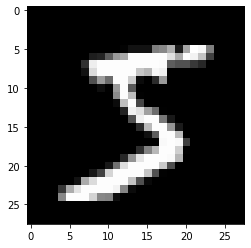

In [10]:
# Showing image at position[] from dataset

image = x_train[0]
plt.imshow(np.squeeze(image),cmap='gray')  # it will remove arrays of single diamensional
plt.show()

In [11]:
# predicting the class of image

image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
predict_model = model.predict([image])
print('predicted class: {}'.format(np.argmax(predict_model)))  # it displays max value

1/1 [==============================] - 0s 216ms/step
predicted class: 5


In [ ]:
'''
Perfect — your file implements **image classification using a CNN (Convolutional Neural Network)** on the **MNIST dataset** (handwritten digits 0–9). Below is a **complete theoretical explanation** of every concept in your practical, followed by **expected viva questions and their ideal answers** — exactly as a university external (like an SPPU chief officer) would ask.

---

## 🧠 **Theory: CNN-based Image Classification Model**

### 1. **Aim**

To implement an image classification model using the **Convolutional Neural Network (CNN)** deep learning architecture.

---

### 2. **Introduction**

A **Convolutional Neural Network (CNN)** is a specialized deep learning architecture mainly used for **image recognition, classification, and object detection** tasks.
It automatically learns **spatial hierarchies of features** (edges → textures → shapes → objects) from images.

---

### 3. **Dataset Used — MNIST**

* **MNIST** stands for *Modified National Institute of Standards and Technology*.
* It contains **70,000 grayscale images** of handwritten digits (0–9).

  * 60,000 images for **training**
  * 10,000 images for **testing**
* Each image is **28 × 28 pixels** and **single-channel (grayscale)**.

---

### 4. **Steps Involved**

#### a. **Importing Libraries**

* **TensorFlow / Keras** → building and training deep learning models.
* **Matplotlib** → for visualization.
* **NumPy** → for numerical operations.

#### b. **Data Loading and Preprocessing**

```python
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```

* Loads data in two sets: training and testing.
* Reshape to `(28, 28, 1)` to match CNN input shape.
* Normalize pixel values:

  ```python
  x_train = x_train / 255
  ```

  This scales data to range [0, 1] — helps faster convergence.

---

### 5. **CNN Architecture**

```python
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
```

#### ➤ **Layer-wise Explanation:**

| Layer              | Purpose                                                               | Key Concept                                                                           |
| ------------------ | --------------------------------------------------------------------- | ------------------------------------------------------------------------------------- |
| **Conv2D**         | Extracts local features from images using filters (kernels).          | The filter slides over the image performing convolution to detect edges, curves, etc. |
| **MaxPooling2D**   | Reduces spatial dimension → reduces computation & avoids overfitting. | Takes the max value from a region (e.g., 2×2).                                        |
| **Flatten**        | Converts 2D feature maps into 1D vector.                              | Required for feeding data into Dense layers.                                          |
| **Dense (Hidden)** | Fully connected layer for learning complex relationships.             | Uses ReLU activation for non-linearity.                                               |
| **Dropout**        | Randomly drops neurons during training to prevent overfitting.        | Here, 30% of neurons are dropped.                                                     |
| **Dense (Output)** | Outputs probability for each class (0–9).                             | Softmax converts scores to probability distribution.                                  |

---

### 6. **Compilation**

```python
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)
```

* **Optimizer (Adam):** Adaptive optimizer that adjusts learning rate.
* **Loss Function:**
  `sparse_categorical_crossentropy` – used when labels are integers (not one-hot encoded).
* **Metric:** Accuracy – measures performance on training/test data.

---

### 7. **Training**

```python
model.fit(x_train, y_train, epochs=5)
```

* **Epoch:** One complete pass of the dataset through the model.
* **Batch size (default = 32):** Number of samples processed before updating weights.
* During training, the model adjusts weights using **backpropagation**.

---

### 8. **Evaluation**

```python
model.evaluate(x_test, y_test)
```

* Evaluates model on unseen test data to check generalization.

---

### 9. **Prediction**

```python
predictions = model.predict(x_test)
```

* Gives probability of each digit (0–9) for every test image.

---

### 10. **Visualization (Optional)**

* Use `matplotlib` to show sample images and their predicted labels.

---

## 📘 **Key Concepts You Must Understand**

| Concept                                 | Explanation                                                                                    |
| --------------------------------------- | ---------------------------------------------------------------------------------------------- |
| **Convolution**                         | Operation of applying filters to extract features like edges, corners, etc.                    |
| **Feature Map**                         | The output of a convolution operation showing detected features.                               |
| **Pooling**                             | Downsampling method to reduce feature map size.                                                |
| **Activation Function (ReLU, Softmax)** | Adds non-linearity; ReLU removes negative values; Softmax converts outputs into probabilities. |
| **Dropout**                             | Technique to prevent overfitting by ignoring random neurons.                                   |
| **Overfitting**                         | Model performs well on training but poorly on new data.                                        |
| **Epoch**                               | One complete iteration over the dataset.                                                       |
| **Optimizer (Adam)**                    | Efficient algorithm for updating weights.                                                      |
| **Loss Function**                       | Measures difference between predicted and actual output.                                       |

---

## 🗣️ **Viva / Oral Questions with Answers**

### 🔹 **Basic Level**

1. **Q:** What is CNN?
   **A:** CNN is a deep learning model designed for image-related tasks. It automatically extracts and learns features from images using convolution and pooling layers.

2. **Q:** Why do we normalize images?
   **A:** To scale pixel values (0–255) to (0–1), which helps the model train faster and improves numerical stability.

3. **Q:** Why use ReLU activation?
   **A:** ReLU introduces non-linearity and prevents vanishing gradient problems.

4. **Q:** What does Softmax do?
   **A:** Converts raw outputs into probabilities that sum to 1 — used for multiclass classification.

---

### 🔹 **Intermediate Level**

5. **Q:** What is the difference between Dense and Convolutional layers?
   **A:** Dense layers connect every neuron to every other neuron, while Convolutional layers use small filters to focus on spatial patterns.

6. **Q:** Why do we use Dropout?
   **A:** To reduce overfitting by randomly turning off neurons during training.

7. **Q:** What optimizer did you use and why?
   **A:** Adam optimizer — combines the advantages of AdaGrad and RMSProp, adapting learning rates automatically.

8. **Q:** What loss function is used for MNIST?
   **A:** Sparse categorical cross-entropy — suitable for multi-class problems with integer labels.

---

### 🔹 **Advanced Level (Chief Examiner Style)**

9. **Q:** How does a CNN differ from a simple ANN?
   **A:** CNNs handle image data with spatial hierarchies using convolution and pooling, while ANNs require flattened inputs and cannot capture local spatial relationships effectively.

10. **Q:** What happens during backpropagation in CNNs?
    **A:** The model updates filter weights and biases using gradient descent to minimize loss based on the error between predicted and actual outputs.

11. **Q:** Why do we use Flatten before Dense?
    **A:** Because Dense layers expect 1D input, while feature maps from convolution layers are 2D.

12. **Q:** How many trainable parameters are there in your model?
    **A:** You can check with `model.summary()`. It shows total trainable parameters — derived from weights and biases of each layer.

13. **Q:** How can you improve accuracy?
    **A:** By increasing epochs, adding more convolution layers, using data augmentation, or tuning hyperparameters.

---

## 🏁 **Conclusion**

The CNN model successfully learns to classify handwritten digits with high accuracy.
It demonstrates how deep learning automates feature extraction and classification in image processing tasks.


'''